<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>Школа глубокого обучения ФПМИ МФТИ</b></h3>

<h3 style="text-align: center;"><b>Домашнее задание. Продвинутый поток. Осень 2020</b></h3>

Это домашнее задание будет посвящено полноценному решению задачи машинного обучения.

Есть две части этого домашнего задания: 
* Сделать полноценный отчет о вашей работе: как вы обработали данные, какие модели попробовали и какие результаты получились (максимум 10 баллов). За каждую выполненную часть будет начислено определенное количество баллов.
* Лучшее решение отправить в соревнование на [kaggle](https://www.kaggle.com/t/f50bc21dbe0e42dabe5e32a21f2e5235) (максимум 5 баллов). За прохождение определенного порогов будут начисляться баллы.


**Обе части будут проверяться в формате peer-review. Т.е. вашу посылку на степик будут проверять несколько других студентов и аггрегация их оценок будет выставлена. В то же время вам тоже нужно будет проверить несколько других учеников.**

**Пожалуйста, делайте свою работу чистой и понятной, чтобы облегчить проверку. Если у вас будут проблемы с решением или хочется совета, то пишите в наш чат в телеграме или в лс @runfme. Если вы захотите проаппелировать оценку, то пипшите в лс @runfme.**

**Во всех пунктах указания это минимальный набор вещей, которые стоит сделать. Если вы можете сделать какой-то шаг лучше или добавить что-то свое - дерзайте!**

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика. 

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [177]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование.

In [178]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

### Работу выполнила Костенок Елизавета 

In [179]:
#data = pd.read_csv('./train.csv') - первоначальный
data = pd.read_csv('/content/sample_data/train.csv')
data.head()

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
0,55,19.50,1026.35,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,0
1,72,25.85,1872.2,Male,0,Yes,No,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),0
2,1,75.90,75.9,Male,0,No,No,Yes,No,Fiber optic,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,1
3,32,79.30,2570,Female,1,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,No,No,No,Month-to-month,No,Mailed check,0
4,60,115.25,6758.45,Female,0,Yes,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0


In [180]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = ['Churn']

Создаю DataFrame nans для проверки на наличие незаполненных значений в датасете и series n_nans, чтобы вывести количество незаполненных значений в каждом стоблце датасета

In [181]:
nans = data.isna()
print(nans)
n_nans = nans.sum(axis = 0)
print(n_nans)
#data = data.replace(np.nan, "0")

      ClientPeriod  MonthlySpending  ...  PaymentMethod  Churn
0            False            False  ...          False  False
1            False            False  ...          False  False
2            False            False  ...          False  False
3            False            False  ...          False  False
4            False            False  ...          False  False
...            ...              ...  ...            ...    ...
5277         False            False  ...          False  False
5278         False            False  ...          False  False
5279         False            False  ...          False  False
5280         False            False  ...          False  False
5281         False            False  ...          False  False

[5282 rows x 20 columns]
ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhone

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

Перед тем, как строить гистограммы для численных признаков, перегоняю колонку TotalSpent в числовой формат

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa8ab4cccf8>,
      dtype=object)

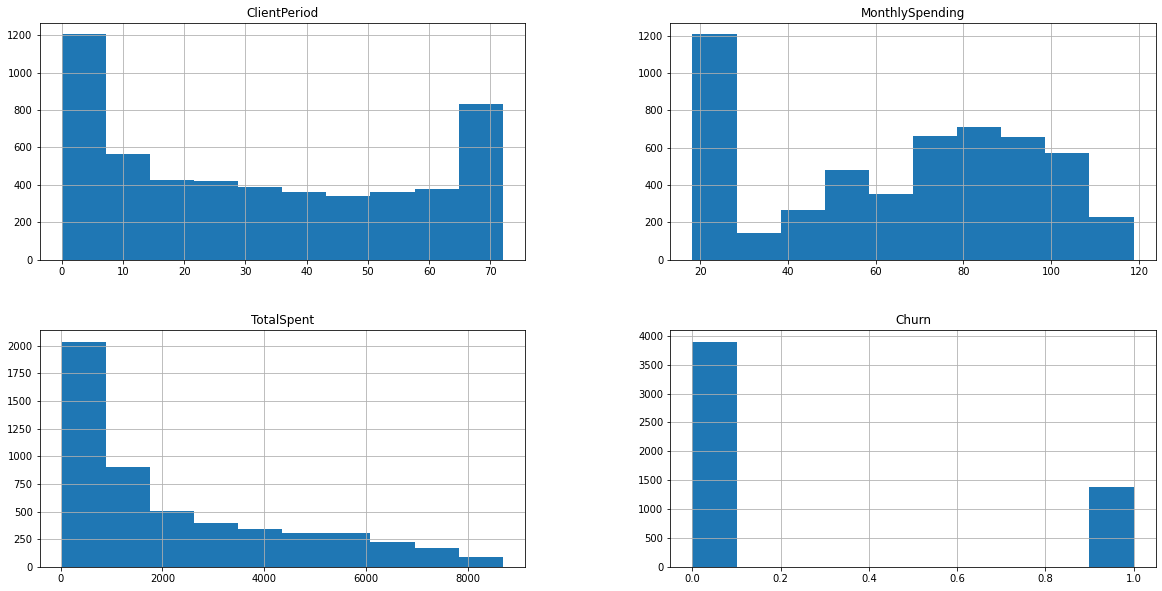

In [182]:
data['TotalSpent'] = pd.to_numeric(data['TotalSpent'], errors='coerce')
data[num_cols + target_col].hist(figsize=(20,10))

Вижу по распределению целевой переменной, что классы не являются сбалансированными, поэтому оправданно использовать в качестве метрики roc_auc, а не, например, accuracy. При этом классы не являются сильно несбалансированными(класса 0 менее чем в 3 раза больше, чем класса 1), т.е. не требуется дополнительных методов борьбы с несбалансированностью

По данным таблицы корреляций числовых признаков и таргета не видно какой-то явной зависимости целевой переменной от какого-либо признака. Большое значение корреляции между clientperiod и totalspent, что очень даже логично, в остальном признаки достаточно слабо зависят друг от друга.

In [168]:
data.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,ClientPeriod,MonthlySpending,TotalSpent,IsSeniorCitizen,Churn
ClientPeriod,1.00,0.25,0.83,0.01,-0.35
MonthlySpending,0.25,1.00,0.65,0.22,0.18
TotalSpent,0.83,0.65,1.00,0.09,-0.20
IsSeniorCitizen,0.01,0.22,0.09,1.00,0.16
Churn,-0.35,0.18,-0.20,0.16,1.00


Строю диаграммы распределения значений для каждого категориального признака


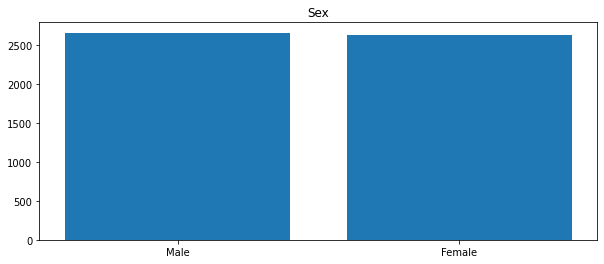

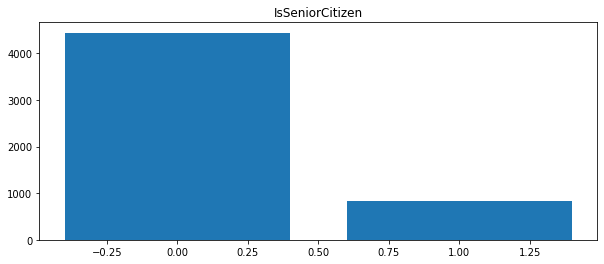

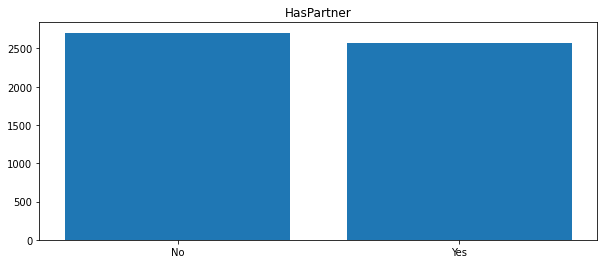

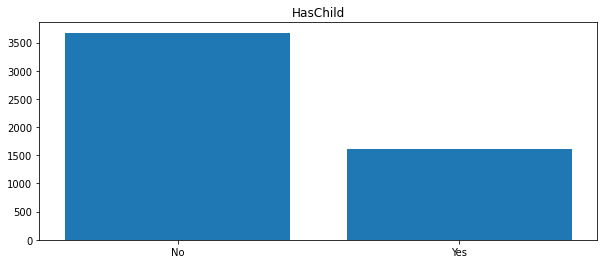

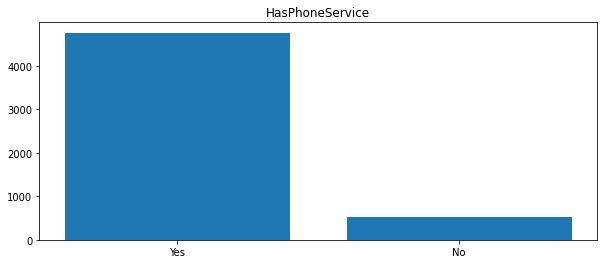

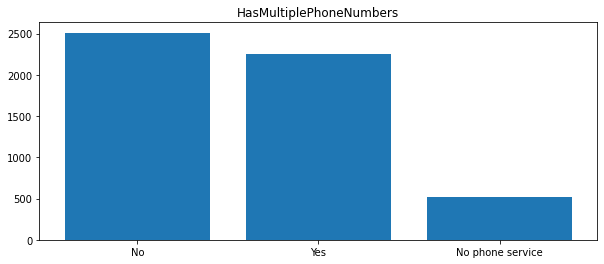

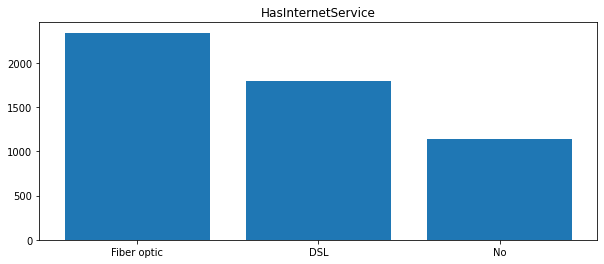

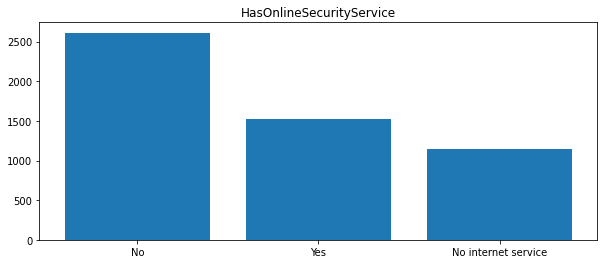

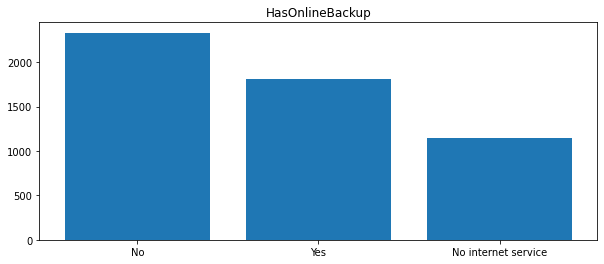

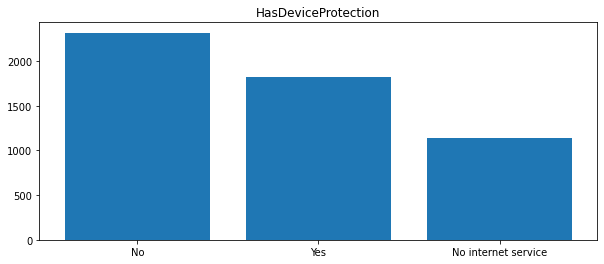

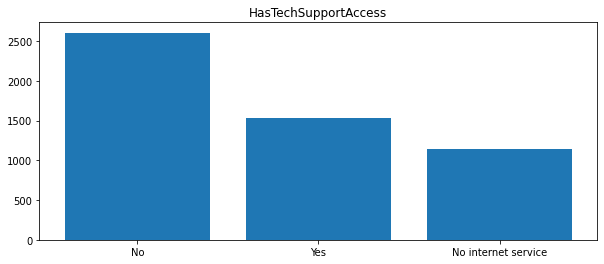

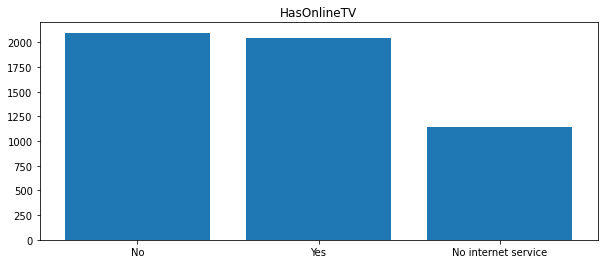

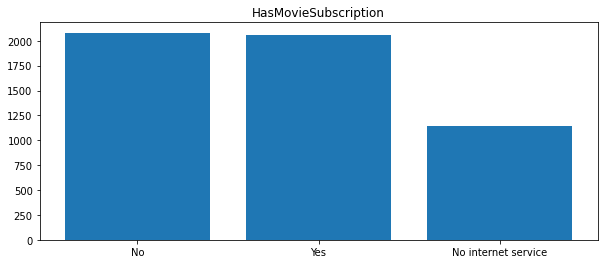

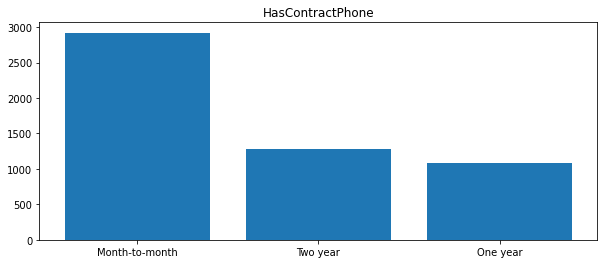

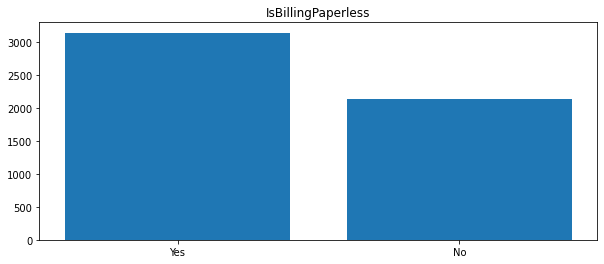

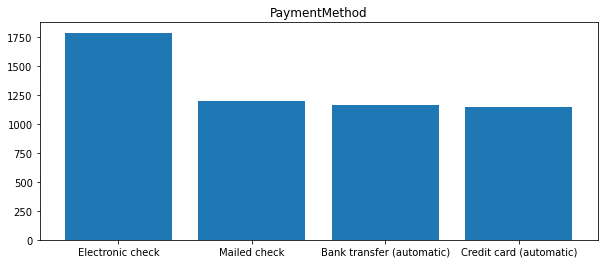

In [49]:
for i in cat_cols:
  fig, ax = plt.subplots()
  cat_values = data.value_counts(i)
  ax.bar(cat_values.index, cat_values.values)
  ax.set_title(i)
  fig.set_figwidth(10)
  plt.show()
  


(Дополнительно) Если вы нашли какие-то ошибки в данных или выбросы, то можете их убрать. Тут можно поэксперементировать с обработкой данных как угодно, но не за баллы.

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [183]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer

Обработка категориальных признаков, приведение к матричному формату признаков и таргета



In [184]:
num_data = data[num_cols].copy()
num_matrix = num_data.values

cat_data = data[cat_cols].copy()
dummy_features = pd.get_dummies(cat_data, columns=cat_cols)
cat_matrix = dummy_features.values

X = np.hstack((num_matrix, cat_matrix))
y = data[data.columns[-1]].values

Делю выборку на train/valid, затем нормирую числовые признаки. Нормировку X_test делаю отдельно от X_train по уже обученному на X_train скелере, чтобы часть выборки, на которой модель обучается, ничего не знала о тестовой части; убираю nans из матрицы признаков

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

np.isnan(X_train).any()
X_train = np.nan_to_num(X_train, copy=False)
X_test = np.nan_to_num(X_test, copy=False)

Использую LogisticRegressionCV, варьирую параметр Cs от 0.00001 до 10000

In [191]:
list(np.power(10.0, np.arange(-5, 5)))

[1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0]

In [195]:
clf = LogisticRegressionCV(list(np.power(10.0, np.arange(-5, 5))), cv=5, 
                           scoring=make_scorer(roc_auc_score), refit=True)

clf.fit(X_train, y_train)
y_train_pred = clf.predict_proba(X_train)[:,1]
y_test_pred = clf.predict_proba(X_test)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))

train roc_auc = 0.8497845661667548
test roc_auc = 0.8365519662921349


ROC-кривые

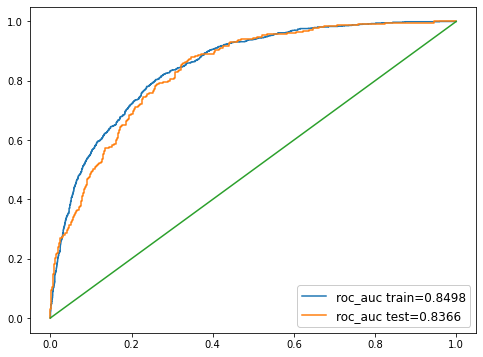

In [197]:
train_metric = roc_auc_score(y_train, y_train_pred)
test_metric = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8,6))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='roc_auc train={:.4f}'.format(train_metric))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='roc_auc test={:.4f}'.format(test_metric))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

Лучшее качество на тестовой части выборки:
roc_auc = 0.8376524604940706.
Это неплохой результат для достаточно простой модели, но применение бустинга позволяет добиться большего


Параметры классификатора:

In [201]:
clf.get_params(deep=True)

{'Cs': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1.0, 10.0, 100.0, 1000.0, 10000.0],
 'class_weight': None,
 'cv': 5,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1.0,
 'l1_ratios': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'refit': True,
 'scoring': make_scorer(roc_auc_score),
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0}

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [218]:
X_train, X_test, y_train, y_test = train_test_split(data[data.columns[:-1]].values, data[data.columns[-1]].values, test_size=0.2, random_state=10)


Выбираю номера столбцов, соотвествующих категориальным признакам

In [208]:
cat_ind = []

for i in range(19):
  if feature_cols[i] in cat_cols:
    cat_ind.append(i)

cat_ind = np.array(cat_ind)

In [58]:
!pip install catboost

Пробую CatBoostClassifier со стандартными параметрами, полученное качество

> train roc_auc = 0.9021059460986144
test roc_auc = 0.8352894675656825



In [200]:
from catboost import CatBoostClassifier

clf1 = CatBoostClassifier(cat_features=cat_ind)
clf1.fit(X_train, y_train)
y_train_pred = clf1.predict_proba(X_train)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
y_test_pred = clf1.predict_proba(X_test)[:,1]
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))

Learning rate set to 0.019062
0:	learn: 0.6796649	total: 22.5ms	remaining: 22.5s
1:	learn: 0.6685261	total: 38.6ms	remaining: 19.3s
2:	learn: 0.6557610	total: 54.2ms	remaining: 18s
3:	learn: 0.6450452	total: 68.9ms	remaining: 17.2s
4:	learn: 0.6341663	total: 84.9ms	remaining: 16.9s
5:	learn: 0.6243175	total: 101ms	remaining: 16.8s
6:	learn: 0.6146192	total: 114ms	remaining: 16.2s
7:	learn: 0.6061071	total: 126ms	remaining: 15.6s
8:	learn: 0.5984353	total: 132ms	remaining: 14.5s
9:	learn: 0.5899505	total: 147ms	remaining: 14.6s
10:	learn: 0.5829984	total: 157ms	remaining: 14.1s
11:	learn: 0.5752420	total: 171ms	remaining: 14.1s
12:	learn: 0.5684062	total: 185ms	remaining: 14.1s
13:	learn: 0.5625860	total: 204ms	remaining: 14.4s
14:	learn: 0.5570061	total: 211ms	remaining: 13.8s
15:	learn: 0.5513298	total: 220ms	remaining: 13.5s
16:	learn: 0.5455702	total: 233ms	remaining: 13.4s
17:	learn: 0.5393691	total: 243ms	remaining: 13.2s
18:	learn: 0.5337182	total: 256ms	remaining: 13.2s
19:	lear

Теперь варьирую параметры, чтобы добиться улучшения результата методом grid_search. Подбираю параметр L2_leaf_reg


In [125]:
clf2 = CatBoostClassifier(iterations = 700, cat_features=cat_ind, 
                          eval_metric="AUC")
grid = {'depth': np.linspace(50, 100, 3),
        'l2_leaf_reg': np.linspace(0, 5, 3)} 
grid_search_res = clf2.grid_search({'l2_leaf_reg': np.linspace(0.0, 1.0, 10)}, X_train, y_train)
print("grid_search best parameters=", grid_search_res)

y_train_pred = clf2.predict_proba(X_train)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
y_test_pred = clf2.predict_proba(X_test)[:,1]
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))


bestTest = 0.8488396763
bestIteration = 123

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8488397	best: 0.8488397 (0)	total: 9.25s	remaining: 1m 23s

bestTest = 0.850313858
bestIteration = 193

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8503139	best: 0.8503139 (1)	total: 18.7s	remaining: 1m 14s

bestTest = 0.8525635398
bestIteration = 38

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8525635	best: 0.8525635 (2)	total: 28.1s	remaining: 1m 5s

bestTest = 0.8563203254
bestIteration = 254

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8563203	best: 0.8563203 (3)	total: 37.6s	remaining: 56.3s

bes

При l2_leaf_reg = 0.6666 получена высокая точность на train выборке, но низкая на test выборке:

> train roc_auc = 0.9103039838594486  test roc_auc = 0.8343269007207625

Варьирую параметры iterations и depth:

In [129]:
clf3 = CatBoostClassifier(cat_features=cat_ind, 
                          eval_metric="AUC") 
grid_search_res = clf3.grid_search({'iterations': np.linspace(100, 1000, 5)}, X_train, y_train, refit=True)
print("grid_search best parameters=", grid_search_res)

y_train_pred = clf3.predict_proba(X_train)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
y_test_pred = clf3.predict_proba(X_test)[:,1]
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))


bestTest = 0.8493371669
bestIteration = 69

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.8493372	best: 0.8493372 (0)	total: 582ms	remaining: 2.33s

bestTest = 0.8526659643
bestIteration = 316

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8526660	best: 0.8526660 (1)	total: 4.55s	remaining: 6.83s

bestTest = 0.8526659643
bestIteration = 316

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8526660	best: 0.8526660 (1)	total: 11.6s	remaining: 7.73s

bestTest = 0.8526659643
bestIteration = 316

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8526660	best: 0.8526660 (1)	total: 21.8s	remaining: 5.46s

best

In [132]:
clf4 = CatBoostClassifier(iterations = 300, cat_features=cat_ind, 
                          eval_metric="AUC") 
grid_search_res = clf4.grid_search({'depth': np.linspace(0, 4, 5)}, X_train, y_train, refit=True)
print("grid_search best parameters=", grid_search_res)

y_train_pred = clf4.predict_proba(X_train)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
y_test_pred = clf4.predict_proba(X_test)[:,1]
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))


bestTest = 0.5
bestIteration = 0

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
0:	loss: 0.5000000	best: 0.5000000 (0)	total: 539ms	remaining: 2.16s

bestTest = 0.8545900824
bestIteration = 294

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
1:	loss: 0.8545901	best: 0.8545901 (1)	total: 1.26s	remaining: 1.89s

bestTest = 0.8543010989
bestIteration = 281

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
2:	loss: 0.8543011	best: 0.8545901 (1)	total: 2.43s	remaining: 1.62s

bestTest = 0.8571543538
bestIteration = 299

Metric AUC is not calculated on train by default. To calculate this metric on train, add hints=skip_train~false to metric parameters.
3:	loss: 0.8571544	best: 0.8571544 (3)	total: 4.09s	remaining: 1.02s

bestTest = 0.8

Замечаю, что в отличие от параметров iterations и l2_leaf_reg, лучшее выбранное значение параметра depth уменьшает качество модели на тренировочной выборке, зато повышает на тестовой


> train roc_auc = 0.8669666204041853 test roc_auc = 0.842531969309463





Использую подобранные значения параметров в финальном классификаторе; увеличиваю кол-во итераций, чтобы несколько скомпенсировать потерю качества на train выборке

In [219]:
best_clf = CatBoostClassifier(iterations=700, cat_features=cat_ind, max_depth=3,
                              l2_leaf_reg=0.7, eval_metric="AUC") 

best_clf.fit(X_train, y_train, plot=True)
y_train_pred = best_clf.predict_proba(X_train)[:,1]
print("train roc_auc =", roc_auc_score(y_train, y_train_pred))
y_test_pred = best_clf.predict_proba(X_test)[:,1]
print("test roc_auc =", roc_auc_score(y_test, y_test_pred))

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	total: 32.6ms	remaining: 22.8s
1:	total: 51.9ms	remaining: 18.1s
2:	total: 65.5ms	remaining: 15.2s
3:	total: 83.3ms	remaining: 14.5s
4:	total: 98ms	remaining: 13.6s
5:	total: 115ms	remaining: 13.3s
6:	total: 122ms	remaining: 12.1s
7:	total: 128ms	remaining: 11.1s
8:	total: 135ms	remaining: 10.3s
9:	total: 141ms	remaining: 9.74s
10:	total: 148ms	remaining: 9.29s
11:	total: 154ms	remaining: 8.86s
12:	total: 162ms	remaining: 8.54s
13:	total: 168ms	remaining: 8.23s
14:	total: 173ms	remaining: 7.92s
15:	total: 179ms	remaining: 7.63s
16:	total: 184ms	remaining: 7.41s
17:	total: 190ms	remaining: 7.22s
18:	total: 195ms	remaining: 7.01s
19:	total: 203ms	remaining: 6.9s
20:	total: 210ms	remaining: 6.79s
21:	total: 217ms	remaining: 6.67s
22:	total: 222ms	remaining: 6.54s
23:	total: 233ms	remaining: 6.55s
24:	total: 239ms	remaining: 6.46s
25:	total: 245ms	remaining: 6.36s
26:	total: 252ms	remaining: 6.27s
27:	total: 258ms	remaining: 6.2s
28:	total: 265ms	remaining: 6.12s
29:	total: 271ms	remain

Выпишите какое лучшее качество и с какими параметрами вам удалось получить

Лучшее качество

> train roc_auc = 0.8706660755563941 test roc_auc = 0.8412648221343875




Параметры лучшей модели(кроме дефолтных)


> iterations=700, max_depth=3, l2_leaf_reg=0.7



In [137]:
from sklearn.metrics import roc_curve

ROC-кривые:


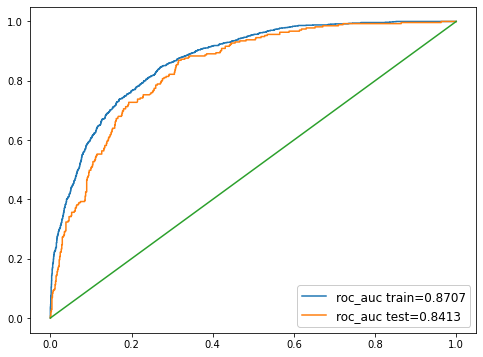

In [141]:
train_metric = roc_auc_score(y_train, y_train_pred)
test_metric = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(8,6))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='roc_auc train={:.4f}'.format(train_metric))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='roc_auc test={:.4f}'.format(test_metric))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

# Предсказания

In [213]:
best_model = best_clf

In [214]:
X_test = pd.read_csv('/content/sample_data/test.csv')
submission = pd.read_csv('/content/sample_data/submission.csv')

In [215]:
submission['Churn'] = best_model.predict_proba(X_test)[:,1]
submission.to_csv('/content/sample_data/my_submission.csv')

In [216]:
submission.head()

,Churn
0,0.036953
1,0.690528
2,0.653130
3,0.012058
4,0.003088


# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.